In [1]:
import sys
sys.path.append("/home/jarlehti/projects/gradu")

In [57]:
import os
import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd
import d3p
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
import glob
import scipy.stats as stats
import itertools
from pprint import pprint
from scripts.constants import COLUMNS_FOR_DATASET
from src.utils.data_utils import transform_for_modeling
from scripts.constants import TEST_DATASETS_FOR_DATASET, TARGET_COLUMNS_FOR_DATASET
from src.napsu_mq.napsu_mq import NapsuMQModel, NapsuMQResult
import graphviz
import networkx as nx

In [3]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
RESULTS_FOLDER = os.path.join(CURRENT_FOLDER, "results")
PLOTS_FOLDER = os.path.join(CURRENT_FOLDER, "plots")

In [4]:
dataset_name = "adult_large"

train_df_path = os.path.join(CURRENT_FOLDER, f"data/datasets/{dataset_name}.csv")
train_df = pd.read_csv(train_df_path)

train_df_transformed = transform_for_modeling(dataset_name, train_df)

In [5]:
rng = jax.random.PRNGKey(42)
model = NapsuMQModel()

n, d = train_df_transformed.shape

meta = model.fit(
    data=train_df_transformed,
    dataset_name="adult_large",
    rng=rng,
    epsilon=8,
    delta=(n ** (-2)),
    column_feature_set=[],
    use_laplace_approximation=True,
    laplace_approximation_algorithm="torch_LBFGS",
    dry_run=True,
    return_MST_weights=True
)

MST_weights = meta['MST_weights']

No experiment_id found: <ContextVar name='experiment_id' at 0x7fd2258839f0>
Setting experiment_id to 3SW0CBDS
Domain size: 224000
Recording:  Query selection
start MST selection
end MST selection
Recording:  Calculating full marginal query
MST query set: [('age', 'marital-status'), ('age', 'workclass'), ('education-num', 'compensation'), ('marital-status', 'sex'), ('marital-status', 'compensation'), ('hours-per-week', 'compensation'), ('had-capital-gains', 'compensation'), ('had-capital-losses', 'compensation')]
Recording:  Calculating canonical query set
Calculating canonical queries, clique_set length: 18


  0%|                                                                                                                | 0/18 [00:00<?, ?it/s]
35it [00:00, 32804.61it/s]

2it [00:00, 11184.81it/s]

16it [00:00, 14617.48it/s]

10it [00:00, 13851.73it/s]

5it [00:00, 11026.04it/s]

4it [00:00, 10845.00it/s]

25it [00:00, 17383.55it/s]

2it [00:00, 9108.15it/s]

2it [00:00, 5038.20it/s]

7it [00:00, 22042.14it/s]

10it [00:00, 13747.31it/s]

2it [00:00, 5641.30it/s]

4it [00:00, 9054.08it/s]

5it [00:00, 23994.87it/s]

32it [00:00, 19426.51it/s]

5it [00:00, 20620.96it/s]

10it [00:00, 27182.79it/s]
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 268435.46it/s]


Calculating new queries, not_original_clique_queries length: 62


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 62/62 [00:00<00:00, 67005.11it/s]

Canonical queries: 106
Junction tree width: 4
(106,)
3.161917034495991


DP noise mean: -0.19499417363755864
[ 8.93670206e+02  8.36939916e+03  4.27818443e+02  1.02432303e+03
  5.42644913e+02 -1.14707867e+00  5.50434153e+02  3.99408529e+03
  3.62190983e+02  7.40717240e+02  2.88911227e+02  1.63218074e+00
  1.32514087e+02  9.55444364e+02  1.24299025e+02  2.98411765e+02
  6.41715971e+01  1.13381470e+01  1.29261246e+01  9.45716275e+01
  1.08482990e+01  3.68408428e+01 -4.48321820e+00 -3.55354520e-01
  4.77513216e+02  8.87158917e+03  1.30824143e+02  4.00188146e+02
  3.80305194e+02  4.86788481e+00  1.27753476e+04  5.41520862e+03
  3.63734619e+02  1.37317490e+02  1.68491449e+03  6.68250823e+03
  2.17090633e+03  4.97335253e+02  1.29170049e+02  4.04197336e+03
  4.57691797e+02  1.82736381e+02  3.13420630e+02  9.93808948e+02
  9.25925955e+01  2.82416233e+01  3.18387698e+02  8.96058451e+01
  2.47517786e+01 -1.67372697e+00  5.53004439e+01  2.21179431e+03
  1.22596276e+03  2.08093303e+02  9.12335242e+00  2.65864808e+03
  6.98101284e+03  2.31292037e+02  1.82364681e+01  1.40

In [6]:
sorted_MST_weights = sorted(MST_weights.items(), key=lambda item: item[1], reverse=True)

In [7]:
sorted_MST_weights

[(('age', 'marital-status'), 14979.659498172507),
 (('marital-status', 'sex'), 12029.2956163893),
 (('marital-status', 'compensation'), 11366.050337255327),
 (('education-num', 'compensation'), 7455.656741880743),
 (('age', 'compensation'), 7109.51356191902),
 (('hours-per-week', 'compensation'), 5800.895705831871),
 (('marital-status', 'hours-per-week'), 5402.939040396636),
 (('sex', 'compensation'), 5298.733921556794),
 (('sex', 'hours-per-week'), 5294.03771397206),
 (('education-num', 'hours-per-week'), 4995.046028917571),
 (('age', 'education-num'), 4702.177299819053),
 (('age', 'workclass'), 4646.892102278957),
 (('age', 'hours-per-week'), 4510.200139155432),
 (('education-num', 'marital-status'), 4321.32259805747),
 (('workclass', 'education-num'), 4059.712344163014),
 (('workclass', 'marital-status'), 3851.312395449755),
 (('had-capital-gains', 'compensation'), 3839.017551858785),
 (('workclass', 'hours-per-week'), 3413.22057031304),
 (('workclass', 'compensation'), 2681.7532056

In [11]:
sorted_MST_weights_map = dict(sorted_MST_weights)
MST_weights_values = sorted_MST_weights_map.values()

In [141]:
def normalize(item_list):
    min_val = min(item_list)
    max_val = max(item_list)
    normalized_list = [round((item-min_val)/(max_val-min_val), 2) for item in item_list]
    return normalized_list

In [142]:
normalized_MST_weights = normalize(MST_weights_values)

In [143]:
sorted_normalized_MST_weights_map = dict(list(zip(sorted_MST_weights_map.keys(), normalized_MST_weights)))

In [144]:
sorted_normalized_MST_weights_map

{('age', 'marital-status'): 1.0,
 ('marital-status', 'sex'): 0.8,
 ('marital-status', 'compensation'): 0.75,
 ('education-num', 'compensation'): 0.48,
 ('age', 'compensation'): 0.46,
 ('hours-per-week', 'compensation'): 0.37,
 ('marital-status', 'hours-per-week'): 0.34,
 ('sex', 'compensation'): 0.34,
 ('sex', 'hours-per-week'): 0.34,
 ('education-num', 'hours-per-week'): 0.32,
 ('age', 'education-num'): 0.3,
 ('age', 'workclass'): 0.29,
 ('age', 'hours-per-week'): 0.28,
 ('education-num', 'marital-status'): 0.27,
 ('workclass', 'education-num'): 0.25,
 ('workclass', 'marital-status'): 0.24,
 ('had-capital-gains', 'compensation'): 0.24,
 ('workclass', 'hours-per-week'): 0.21,
 ('workclass', 'compensation'): 0.16,
 ('workclass', 'sex'): 0.15,
 ('age', 'sex'): 0.15,
 ('marital-status', 'had-capital-gains'): 0.11,
 ('education-num', 'sex'): 0.1,
 ('education-num', 'had-capital-gains'): 0.1,
 ('age', 'had-capital-gains'): 0.09,
 ('had-capital-losses', 'compensation'): 0.08,
 ('hours-per-we

In [82]:
dot = graphviz.Graph('Adult large MST weight diagram', engine="circo")
G = nx.Graph()

In [83]:
columns = train_df.columns
for column in columns:
    dot.node(column)
    G.add_node(column)
    
for key, val in sorted_normalized_MST_weights_map.items():
    weight = round(val, 2)
    
    node1 = key[0]
    node2 = key[1]
    
    dot.edge(node1, node2, label=f'{weight}')
    
    G.add_edge(node1, node2, weight=weight)

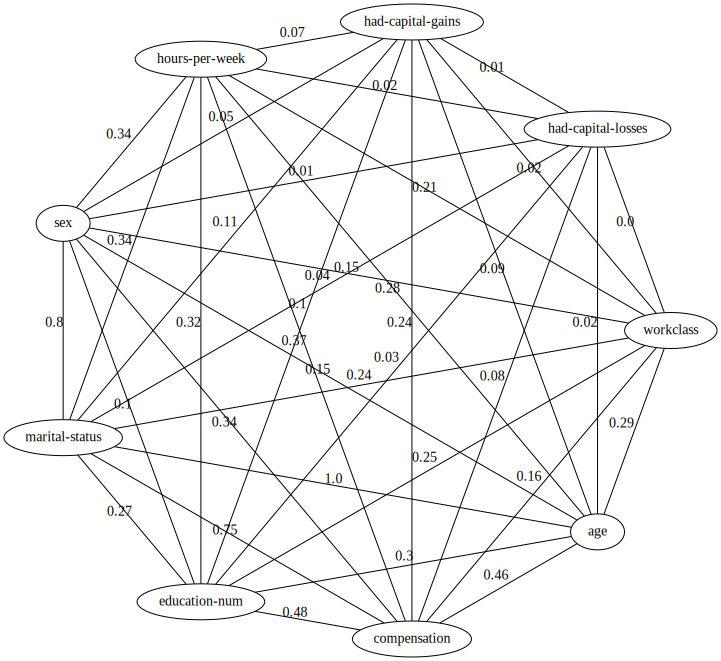

In [84]:
dot

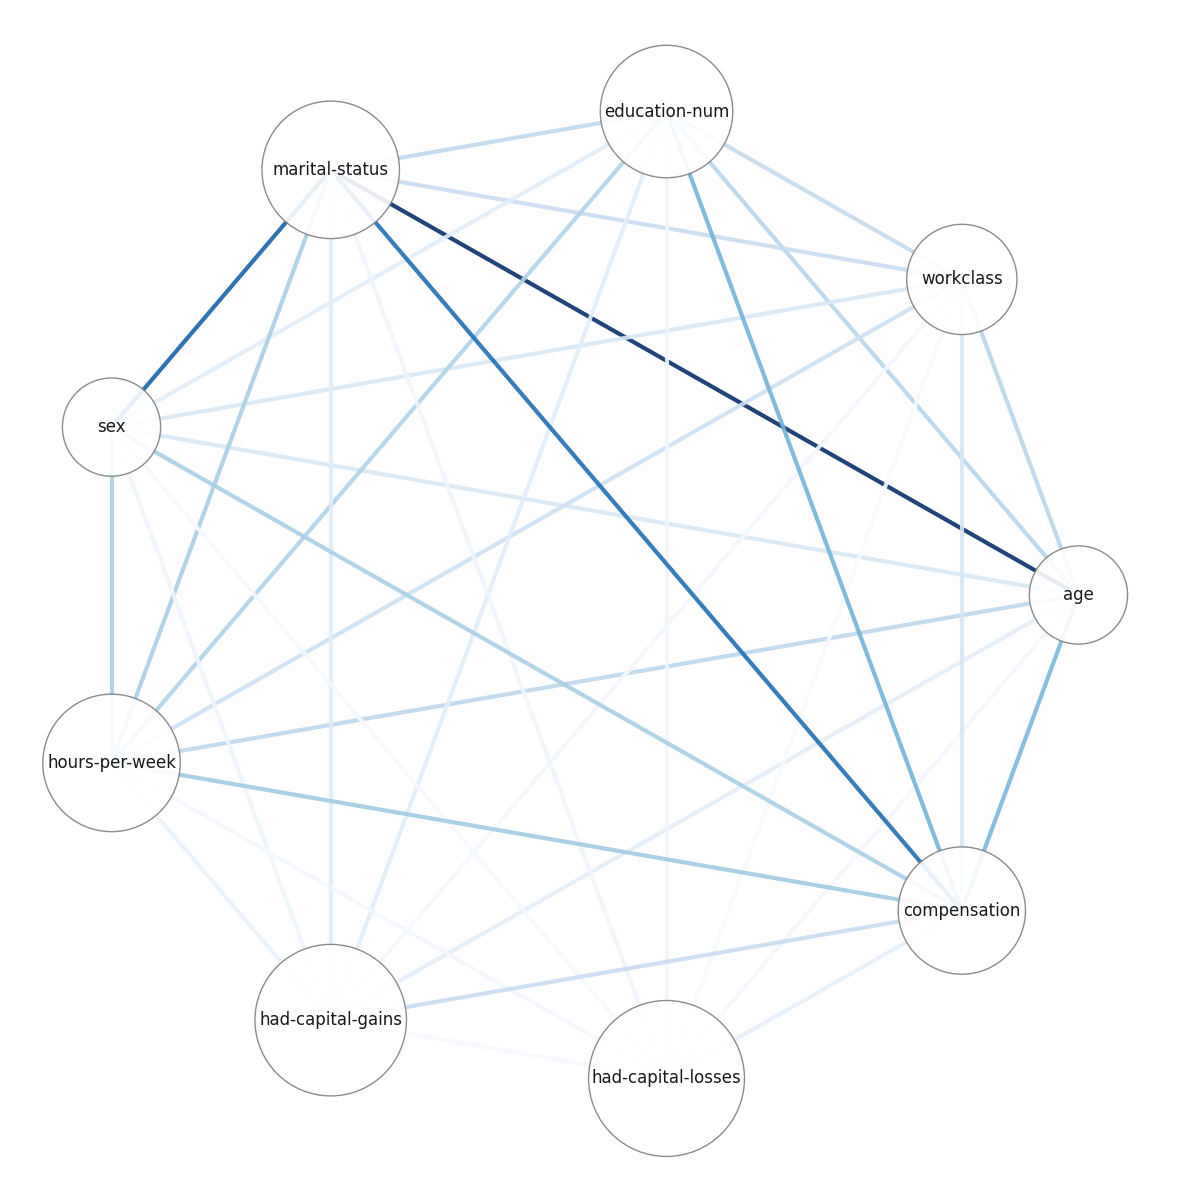

In [131]:
edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
pos = nx.circular_layout(G)
base_size = 700
node_sizes = [np.max([len(v) * base_size, 5000]) for v in G.nodes()]
options = {"edgecolors": "tab:gray", "alpha": 0.9, 'node_size': node_sizes}
fig, ax = plt.subplots(figsize=(12, 12))
nx.draw(G, pos, ax=ax, with_labels=True, node_color='white', node_shape="o", edgelist=edges, edge_color=weights, width=3.0, edge_cmap=plt.cm.Blues, **options)
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(PLOTS_FOLDER, "adult_large_MST_weights.pdf"))

In [132]:
def calculate_pairwise_independence_ranking(df, return_p = False):
    columns = df.columns
    column_pairs = list(itertools.combinations(columns, 2))
    ranking = []
    for pair in column_pairs:
        crosstab_df = pd.crosstab(df[pair[0]], df[pair[1]])
        chi2_stat, p, dof, expected = stats.chi2_contingency(crosstab_df)
        if return_p == True:
            ranking.append((pair, chi2_stat, p))
        else:
            ranking.append((pair, chi2_stat))
    
    sorted_ranking = sorted(ranking, key=lambda x: x[1], reverse=False)
    
    return sorted_ranking

In [155]:
chi_squared_ranking = calculate_pairwise_independence_ranking(train_df, return_p=True)

In [156]:
print(chi_squared_ranking)

[(('workclass', 'had-capital-losses'), 47.53173465804493, 1.465546305329186e-08), (('sex', 'had-capital-losses'), 52.6989349559476, 3.8880188822414644e-13), (('hours-per-week', 'had-capital-losses'), 93.36249403773687, 2.540619437558419e-19), (('age', 'had-capital-losses'), 109.87162615781382, 7.751209520023673e-23), (('sex', 'had-capital-gains'), 134.36526486773948, 4.545439237743904e-31), (('had-capital-gains', 'had-capital-losses'), 136.47514740610606, 1.5706724395523988e-31), (('workclass', 'had-capital-gains'), 154.46287667772305, 8.802703829392883e-31), (('marital-status', 'had-capital-losses'), 169.61545632105216, 1.264730642282158e-35), (('hours-per-week', 'had-capital-gains'), 243.9312969336107, 1.3206133813394754e-51), (('education-num', 'sex'), 250.19501893764044, 1.1318825195405444e-44), (('education-num', 'had-capital-losses'), 260.38988398728196, 8.950448720621215e-47), (('age', 'sex'), 283.69236490156163, 3.563315861041613e-60), (('age', 'had-capital-gains'), 403.8205270

In [157]:
chi_squared_ranking = calculate_pairwise_independence_ranking(train_df)
chi_squared_ranking_map = dict(chi_squared_ranking)

In [158]:
chi_squared_ranking_map

{('workclass', 'had-capital-losses'): 47.53173465804493,
 ('sex', 'had-capital-losses'): 52.6989349559476,
 ('hours-per-week', 'had-capital-losses'): 93.36249403773687,
 ('age', 'had-capital-losses'): 109.87162615781382,
 ('sex', 'had-capital-gains'): 134.36526486773948,
 ('had-capital-gains', 'had-capital-losses'): 136.47514740610606,
 ('workclass', 'had-capital-gains'): 154.46287667772305,
 ('marital-status', 'had-capital-losses'): 169.61545632105216,
 ('hours-per-week', 'had-capital-gains'): 243.9312969336107,
 ('education-num', 'sex'): 250.19501893764044,
 ('education-num', 'had-capital-losses'): 260.38988398728196,
 ('age', 'sex'): 283.69236490156163,
 ('age', 'had-capital-gains'): 403.8205270178048,
 ('marital-status', 'had-capital-gains'): 474.99363093065386,
 ('had-capital-losses', 'compensation'): 571.9808203656755,
 ('education-num', 'had-capital-gains'): 602.9520706944656,
 ('workclass', 'sex'): 634.2371427089755,
 ('workclass', 'compensation'): 804.1575273043354,
 ('workcla

In [146]:
chi_squared_values = chi_squared_ranking_map.values()

In [152]:
G = nx.Graph()

In [151]:
normalized_chi_squared_weights = normalize(chi_squared_values)
sorted_normalized_chi_squared_map = dict(list(zip(chi_squared_ranking_map.keys(), normalized_chi_squared_weights)))

In [153]:
columns = train_df.columns
for column in columns:
    G.add_node(column)
    
for key, val in sorted_normalized_chi_squared_map.items():
    weight = round(val, 2)
    
    node1 = key[0]
    node2 = key[1]
        
    G.add_edge(node1, node2, weight=weight)

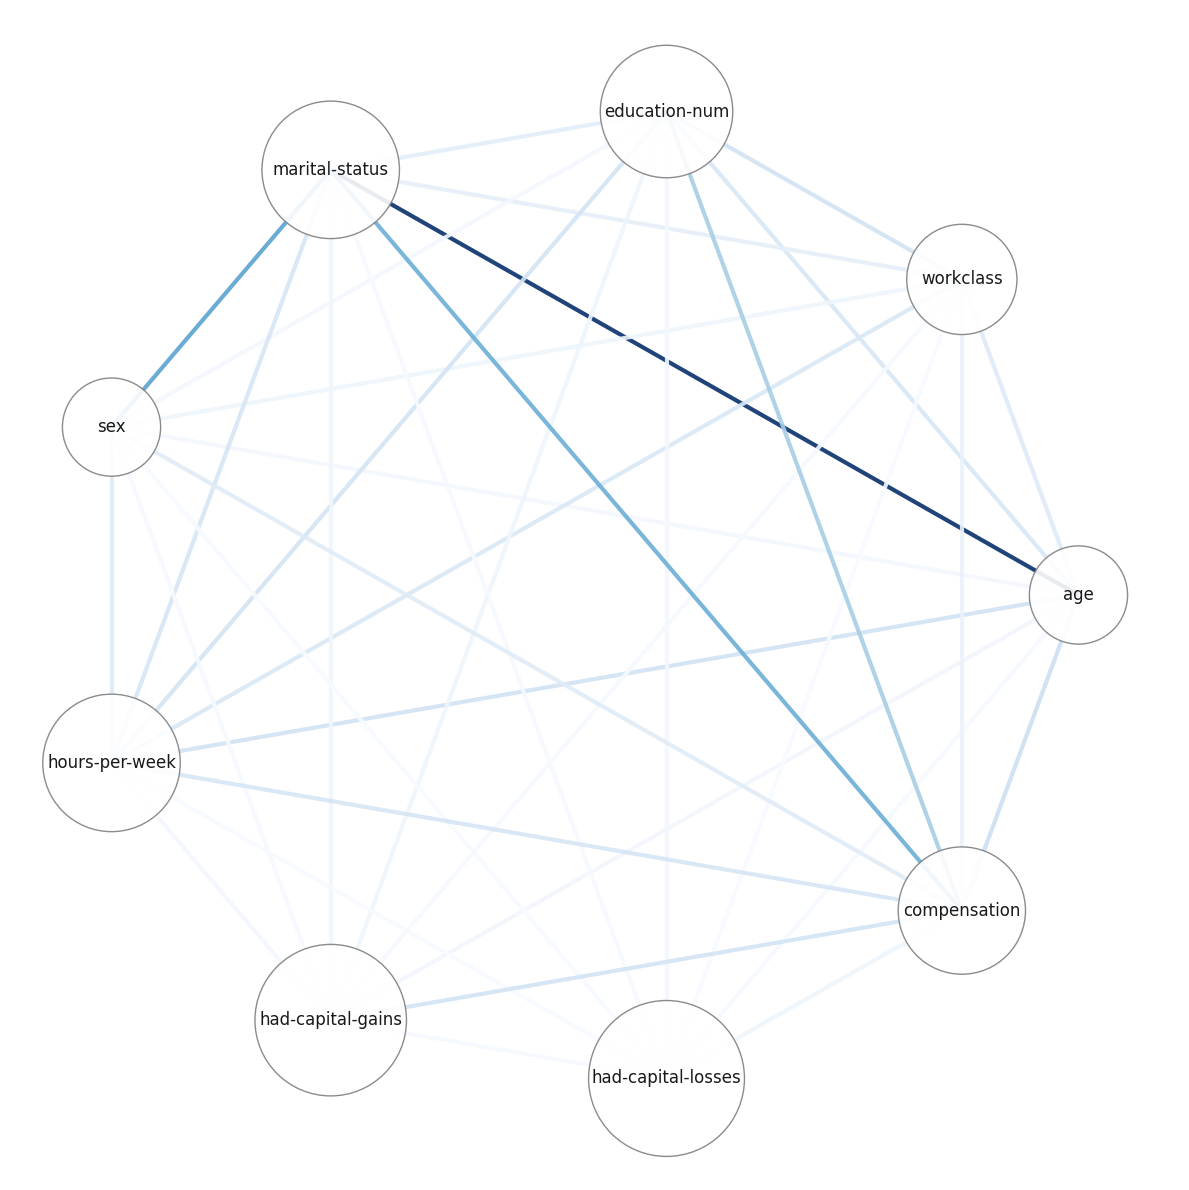

In [154]:
edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
pos = nx.circular_layout(G)
base_size = 700
node_sizes = [np.max([len(v) * base_size, 5000]) for v in G.nodes()]
options = {"edgecolors": "tab:gray", "alpha": 0.9, 'node_size': node_sizes}
fig, ax = plt.subplots(figsize=(12, 12))
nx.draw(G, pos, ax=ax, with_labels=True, node_color='white', node_shape="o", edgelist=edges, edge_color=weights, width=3.0, edge_cmap=plt.cm.Blues, **options)
plt.tight_layout()
plt.show()

In [172]:
dataset_name = "adult_independence_pruning"

train_df_path = os.path.join(CURRENT_FOLDER, f"data/datasets/{dataset_name}.csv")
train_df = pd.read_csv(train_df_path)

train_df_transformed = transform_for_modeling(dataset_name, train_df)

In [173]:
train_df

,age,education-num,sex,hours-per-week,compensation
0,"(16.927, 53.5]",13,Male,"(0.902, 50.0]",0
1,"(16.927, 53.5]",13,Male,"(0.902, 50.0]",0
2,"(16.927, 53.5]",9,Male,"(0.902, 50.0]",0
3,"(16.927, 53.5]",7,Male,"(0.902, 50.0]",0
4,"(16.927, 53.5]",13,Female,"(0.902, 50.0]",0
...,...,...,...,...,...
30157,"(16.927, 53.5]",12,Female,"(0.902, 50.0]",0
30158,"(16.927, 53.5]",9,Male,"(0.902, 50.0]",1
30159,"(53.5, 90.0]",9,Female,"(0.902, 50.0]",0
30160,"(16.927, 53.5]",9,Male,"(0.902, 50.0]",0


In [174]:
rng = jax.random.PRNGKey(42)
model = NapsuMQModel()

n, d = train_df_transformed.shape

meta = model.fit(
    data=train_df_transformed,
    dataset_name="adult_small",
    rng=rng,
    epsilon=8,
    delta=(n ** (-2)),
    column_feature_set=[],
    use_laplace_approximation=True,
    laplace_approximation_algorithm="torch_LBFGS",
    dry_run=True,
    return_MST_weights=True
)

MST_weights = meta['MST_weights']

Domain size: 256
Recording:  Query selection
start MST selection
end MST selection
Recording:  Calculating full marginal query
MST query set: [('age', 'education-num'), ('education-num', 'compensation'), ('sex', 'compensation'), ('sex', 'hours-per-week')]
Recording:  Calculating canonical query set
Calculating canonical queries, clique_set length: 10


  0%|                                                                                                                                                                 | 0/10 [00:00<?, ?it/s]
32it [00:00, 30897.27it/s]

4it [00:00, 25536.10it/s]

2it [00:00, 19737.90it/s]

2it [00:00, 11199.74it/s]

32it [00:00, 23113.09it/s]

4it [00:00, 8876.83it/s]

16it [00:00, 29746.84it/s]

2it [00:00, 5970.54it/s]

2it [00:00, 8224.13it/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 129055.51it/s]


Calculating new queries, not_original_clique_queries length: 19


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 51414.05it/s]

Canonical queries: 51
Junction tree width: 2
(51,)
2.235812976641374


DP noise mean: 0.10167308204221397
[4.98992268e+01 6.96191874e+01 2.24267501e+02 1.07708506e+02
 1.86164387e+02 1.12123978e+02 4.28402228e+01 1.43488293e+03
 7.46636960e+02 1.27438239e+02 7.72707485e+01 5.67791238e+02
 2.74037302e+02 1.00277724e+02 9.79838986e+01 1.08782118e+02
 2.22094322e+02 3.32529742e+02 3.50721531e+02 6.34810334e+02
 9.26465998e+02 3.40405390e+02 8.40644532e+03 5.93717498e+03
 1.18004753e+03 9.29397954e+02 4.47355585e+03 1.34850967e+03
 4.41307601e+02 2.73409644e+02 8.27888669e+00 6.39596368e+03
 1.39838738e+04 9.51522197e+00 1.48989943e+01 3.47671661e+01
 2.62729716e+01 5.71256559e+01 5.96339336e+01 2.83683465e+01
 1.61721395e+03 1.34293559e+03 3.39008892e+02 2.55658646e+02
 2.12358638e+03 9.15461829e+02 4.03840360e+02 2.80076708e+02
 1.88766028e+00 2.94031342e+03 5.31903168e+02]
SUFF STAT MEANS
1205.686274509804
1205.787947591846
SUFF STAT VARIANCES
6207849.744713571
6206957.942634349


In [175]:
sorted_MST_weights = sorted(MST_weights.items(), key=lambda item: item[1], reverse=True)
sorted_MST_weights_map = dict(sorted_MST_weights)
MST_weights_values = sorted_MST_weights_map.values()
normalized_MST_weights = normalize(MST_weights_values)
sorted_normalized_MST_weights_map = dict(list(zip(sorted_MST_weights_map.keys(), normalized_MST_weights)))

In [176]:
G = nx.Graph()

In [177]:
columns = train_df.columns
for column in columns:
    dot.node(column)
    G.add_node(column)
    
for key, val in sorted_normalized_MST_weights_map.items():
    weight = round(val, 2)
    
    node1 = key[0]
    node2 = key[1]
        
    G.add_edge(node1, node2, weight=weight)

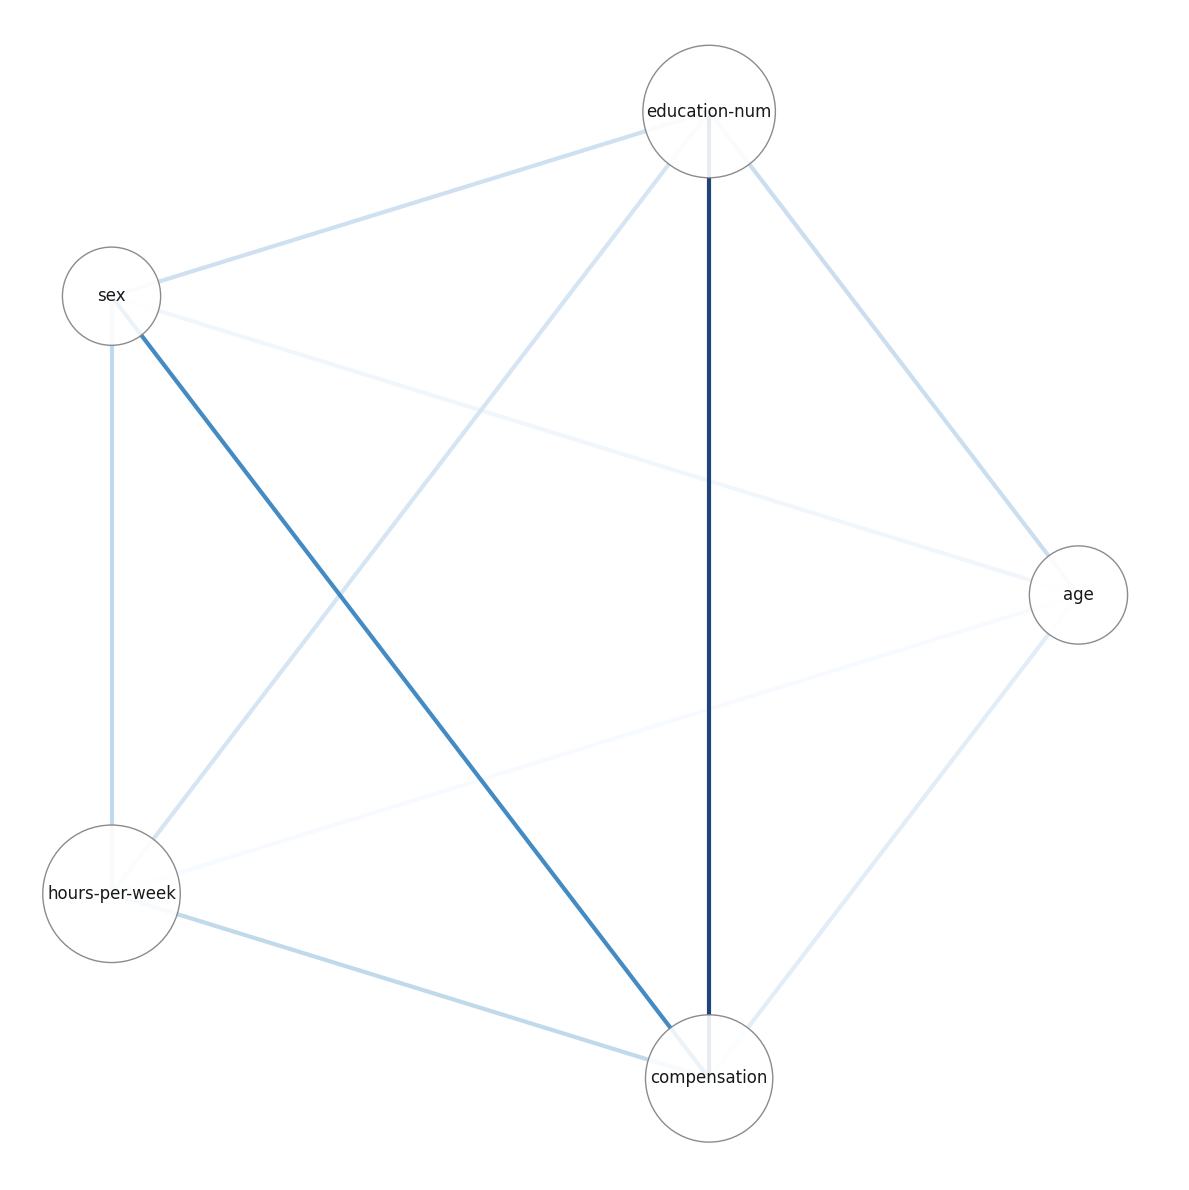

In [179]:
edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
pos = nx.circular_layout(G)
base_size = 700
node_sizes = [np.max([len(v) * base_size, 5000]) for v in G.nodes()]
options = {"edgecolors": "tab:gray", "alpha": 0.9, 'node_size': node_sizes}
fig, ax = plt.subplots(figsize=(12, 12))
nx.draw(G, pos, ax=ax, with_labels=True, node_color='white', node_shape="o", edgelist=edges, edge_color=weights, width=3.0, edge_cmap=plt.cm.Blues, **options)
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(PLOTS_FOLDER, "adult_independence_pruning_MST_weights.pdf"))